<a href="https://colab.research.google.com/github/eubielaraujo/MalariaDiagnosisCNN/blob/main/Malaria_Diagnosis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset, dataset_info = tfds.load(
    "malaria", with_info=True, shuffle_files=True)

In [ ]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_ds = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  val_test_ds = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_ds = val_test_ds.take(int(VAL_RATIO*DATASET_SIZE))
  test_ds = val_test_ds.skip(int(TEST_RATIO*DATASET_SIZE))

  return train_ds, val_ds, test_ds

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_ds, val_ds, test_ds = split(dataset['train'], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [ ]:
train_ds

In [ ]:
def get_label_str(label):
  if label == 0:
    return 'Parasitized'
  else:
    return 'Uninfected'

In [ ]:
for i, sample in enumerate(train_ds.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label'].numpy()))

In [ ]:
IM_SIZE = 224
BATCH_SIZE = 32

In [ ]:
def resize_rescale(data):
  image = data['image']
  label = data['label']

  # exemplo de preprocessamento
  image = tf.image.resize(image, (IM_SIZE, IM_SIZE))
  image = image / 255.0

  return image, label

In [ ]:
train_dataset = train_ds.map(resize_rescale).shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_ds.map(resize_rescale).shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_ds.map(resize_rescale).shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

In [ ]:
np.unique(image)

In [ ]:
model = tf.keras.Sequential([
 InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),

 Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
 BatchNormalization(),
 MaxPool2D(pool_size = 2, strides = 2),

 Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
 BatchNormalization(),
 MaxPool2D(pool_size = 2, strides = 2),

 Flatten(),

 Dense(100, activation='relu'),
 BatchNormalization(),
 Dense(10, activation='relu'),
 BatchNormalization(),
 Dense(1, activation = 'sigmoid'),

])
model.summary()

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = BinaryCrossentropy(),
    metrics = [BinaryAccuracy()],
)

In [73]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 64ms/step - binary_accuracy: 0.7993 - loss: 0.4260 - val_binary_accuracy: 0.9430 - val_loss: 0.1767
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - binary_accuracy: 0.9379 - loss: 0.1889 - val_binary_accuracy: 0.9042 - val_loss: 0.2805
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - binary_accuracy: 0.9456 - loss: 0.1650 - val_binary_accuracy: 0.9525 - val_loss: 0.1718
Epoch 4/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - binary_accuracy: 0.9543 - loss: 0.1418 - val_binary_accuracy: 0.6479 - val_loss: 9.0271
Epoch 5/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - binary_accuracy: 0.9488 - loss: 0.1530 - val_binary_accuracy: 0.9426 - val_loss: 0.1843
Epoch 6/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - binary_accuracy: 0.9547 - loss: 0.1341 - val_binary_accuracy: 0.9521 - val_loss: 0.1614
Epoch 7/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - binary_accuracy: 0.9617 - loss: 0.1160 - val_binary_accuracy: 0.9416 - va

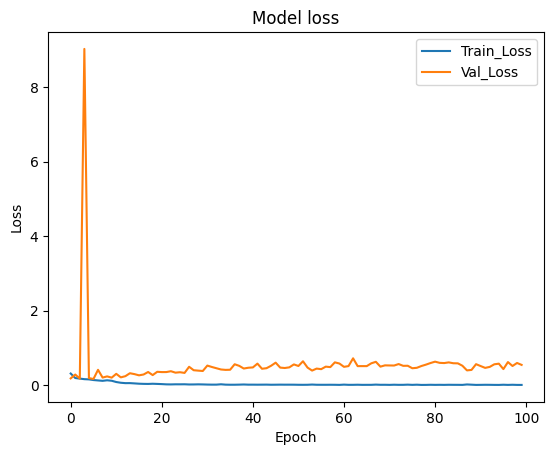

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Val_Loss'])
plt.show()

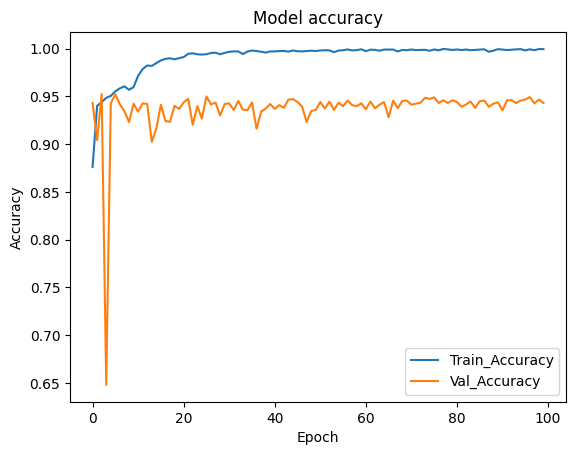

In [75]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Accuracy', 'Val_Accuracy'])
plt.show()